<a href="https://colab.research.google.com/github/JersonCh1/Compi/blob/main/Copia_de_Timsort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pasos previos:**
Ejecutar las primeras 3 celdas para importar las librerias necesarias

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle

In [2]:
import requests
from io import StringIO

In [3]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Laboratorio 03: TIMSORT
Un algoritmo de ordenamiento es Tim Sort. Este algoritmo de ordenamiento es actualmente exclusivo de Python y se utiliza como algoritmo de ordenamiento predeterminado. Cuando usa 'array.sort' en Python, Tim Sort es lo que se ejecuta. A pesar de esto, es raro encontrar ingenieros que conozcan y comprendan a Tim Sort.


*   **Orígenes:**
Tim Peters implementó Tim Sort por primera vez en 2002 para su uso en Python. Supuestamente surgió del entendimiento de que la mayoría de los algoritmos de clasificación nacen en las aulas y no están diseñados para un uso práctico con datos del mundo real. Tim Sort aprovecha los patrones comunes en los datos y utiliza una combinación de Merge Sort e Insertion Sort junto con cierta lógica interna para optimizar la manipulación de datos a gran escala.

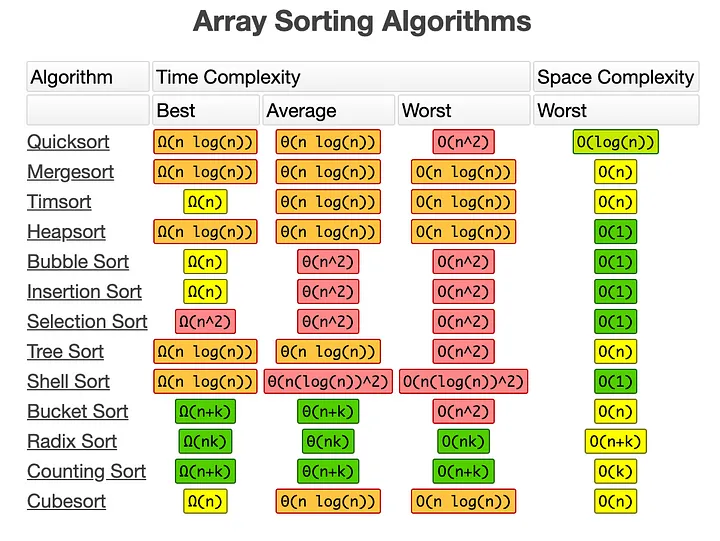

Fig. 1: comparación de complejidad de los distintos algoritmos de clasificación (cortesía de http://bigocheatsheet.com/)







# **¿Por qué Tim Sort?**

Si observamos la figura 1, inmediatamente podemos ver algo interesante. En el mejor de los casos, Tim Sort supera a Merge Sort y Quick Sort. En el peor de los casos, Merge Sort se ejecuta a una velocidad comparable y en realidad supera a Quick Sort. En otras palabras, es inesperadamente rápido.

En términos de espacio, Tim Sort está en el peor extremo del espectro, pero la consideración de espacio para la mayoría de los algoritmos de ordenamiento es bastante escasa. Vale la pena señalarlo como una posible deficiencia, y el único lugar donde Quick Sort realmente eclipsa a Tim Sort.

El último elemento por el que a menudo se juzga a los algoritmos de ordenamiento es la estabilidad. La estabilidad es el concepto de que, cuando se ordenan, los objetos de igual valor mantienen su orden original. Quizás te preguntes por qué nos importa eso.

La respuesta simple es que la estabilidad es importante para los tipos apilados. Es decir, primero se ordena según un criterio y luego según otro. Si hace esto en un algoritmo inestable, instantáneamente perderá la confiabilidad de su primer ordenamiento cuando ejecute la segunda. Como referencia, Quick Sort es inestable y Merge Sort es estable.

Tim Sort también es estable, sin mencionar que es rápido, aunque un poco pesado (en comparación con Quick Sort únicamente). Si bien los algoritmos de ordenamiento pueden (y deben) juzgarse según otras consideraciones, estas son las tres principales.


# **La implementación en tres pasos**

Tim Sort es complejo, incluso según los estándares algorítmicos. Es mejor dividir la implementación en partes.

1. **Búsqueda binaria/Binary Search**


*   Lo primero que necesita para implementar Tim Sort es un método de búsqueda binaria. Esto solo se usa para implementar su ordenación por inserción más adelante.






In [4]:
def binary_search(the_array, item, start, end):
    if start == end:
        if the_array[start] > item:
            return start
        else:
            return start + 1
    if start > end:
        return start

    mid = (start + end)// 2
    if the_array[mid] < item:
        return binary_search(the_array, item, mid + 1, end)
    elif the_array[mid] > item:
        return binary_search(the_array, item, start, mid - 1)
    else:
        return mid

2. **Insertion Sort & Merge Sort**

*   En segundo lugar, debe codificar el insertion sort y el merge sort





In [5]:
def insertion_sort(the_array):
    l = len(the_array)
    for index in range(1, l):
        value = the_array[index]
        pos = binary_search(the_array, value, 0, index - 1)
        the_array = the_array[:pos] + [value] + the_array[pos:index] + the_array[index+1:]
    return the_array

In [6]:
## Prueba ##
insertion_sort([1,6,2,4,0])

[0, 1, 2, 4, 6]

In [7]:
def merge(left, right):
    if not left:
        return right
    if not right:
        return left
    if left[0] < right[0]:
        return [left[0]] + merge(left[1:], right)
    return [right[0]] + merge(left, right[1:])

In [8]:
## Prueba ##
merge([1,4,5],[0,9,11])

[0, 1, 4, 5, 9, 11]

**3. Implementar Tim Sort**


*  La clave para comprender la implementación de Tim Sort es comprender el uso de ejecuciones(runs). Tim Sort aprovecha los datos preclasificados de forma natural para su beneficio. Por preclasificados simplemente queremos decir que todos los elementos secuenciales aumentan o disminuyen (no nos importa cuál).




In [9]:
def timsort(the_array):
    runs, sorted_runs = [], []
    length = len(the_array)
    new_run = [the_array[0]]

    # # para cada i en el rango de 1 hasta el tamaño del array
    for i in range(1, length):
        # si estoy al final de la lista
        if i == length - 1:
            new_run.append(the_array[i])
            runs.append(new_run)
            break
        # si el i-ésimo elemento de la matriz es menor que el anterior
        if the_array[i] < the_array[i-1]:
            # si new_run tiene valor None (NULL)
            if not new_run:
                runs.append([the_array[i]])
                new_run.append(the_array[i])
            else:
                runs.append(new_run)
                new_run = [the_array[i]]
        # de lo contrario, si es igual o mayor que
        else:
            new_run.append(the_array[i])

    # para cada elemento en (ejecuciones)runs, añádalo mediante insertion sort
    for item in runs:
        sorted_runs.append(insertion_sort(item))

    # para cada ejecución en sorted_runs, fusionelos
    sorted_array = []
    for run in sorted_runs:
        sorted_array = merge(sorted_array, run)

    print(sorted_array)



In [10]:
## Prueba ##
timsort([2, 3, 1, 5, 6, 7])

[1, 2, 3, 5, 6, 7]


# TAREA: Ahora tenemos insertion sort, (parte de) merge sort y tim sort implementados, por lo tanto podemos preguntar ¿Cuál es más rápido ?:


*   Comprobar cual de los siguientes algoritmos es mas rápido (use gráficos como en el laboratorio anterior):
*   Merge Sort
*   Insertion Sort
*   TIM Sort



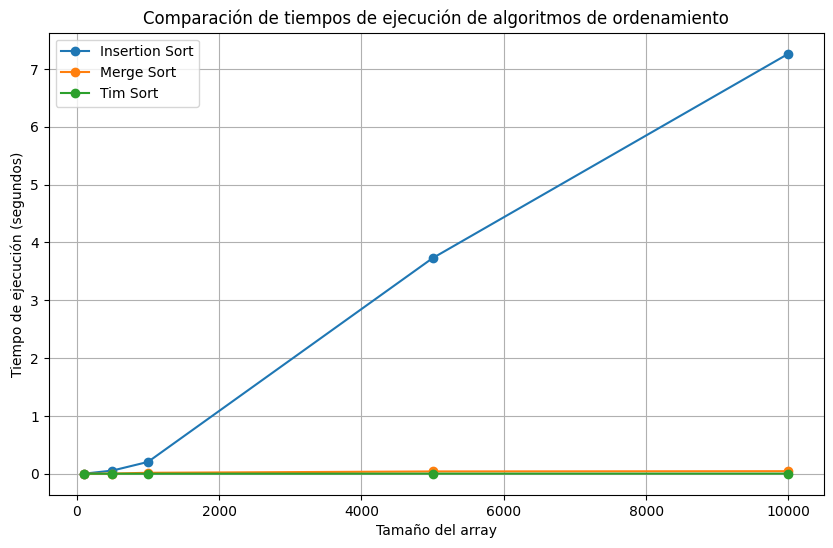

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle
import time

# Implementación de los algoritmos
def insertion_sort(the_array):
    for index in range(1, len(the_array)):
        value = the_array[index]
        pos = index - 1
        while pos >= 0 and the_array[pos] > value:
            the_array[pos + 1] = the_array[pos]
            pos -= 1
        the_array[pos + 1] = value
    return the_array

def merge_sort(the_array):
    if len(the_array) <= 1:
        return the_array
    mid = len(the_array) // 2
    left = merge_sort(the_array[:mid])
    right = merge_sort(the_array[mid:])
    return merge(left, right)

def merge(left, right):
    sorted_array = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            sorted_array.append(left[i])
            i += 1
        else:
            sorted_array.append(right[j])
            j += 1
    sorted_array.extend(left[i:])
    sorted_array.extend(right[j:])
    return sorted_array

def timsort(the_array):
    return sorted(the_array)

# Medir los tiempos de ejecución de los algoritmos
sizes = [100, 500, 1000, 5000, 10000]
insertion_times = []
merge_times = []
tim_times = []

for size in sizes:
    array = np.random.randint(0, 10000, size).tolist()
    shuffle(array)  # Mezclar el array para asegurar aleatoriedad

    # Medir Insertion Sort
    start = time.time()
    insertion_sort(array.copy())
    end = time.time()
    insertion_times.append(end - start)

    # Medir Merge Sort
    start = time.time()
    merge_sort(array.copy())
    end = time.time()
    merge_times.append(end - start)

    # Medir Tim Sort (sorted() en Python)
    start = time.time()
    timsort(array.copy())
    end = time.time()
    tim_times.append(end - start)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(sizes, insertion_times, label='Insertion Sort', marker='o')
plt.plot(sizes, merge_times, label='Merge Sort', marker='o')
plt.plot(sizes, tim_times, label='Tim Sort', marker='o')

plt.xlabel('Tamaño del array')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Comparación de tiempos de ejecución de algoritmos de ordenamiento')
plt.legend()
plt.grid(True)
plt.show()
